In [1]:
from models.reinforcement_learning import *

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


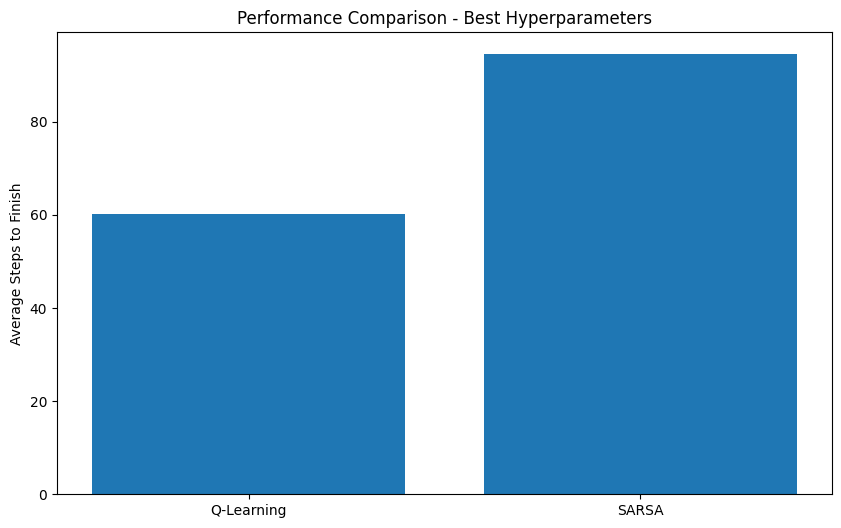

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the racetrack
racetrack = Racetrack("datasets/W-track.txt")
simulator = Simulator(racetrack, crash_option='nearest')

# Set up the experiment parameters
num_experiments = 10
num_episodes = 2000

# Define the hyperparameter values to tune
learning_rates = [0.1, 0.2, 0.3]
discount_factors = [0.9, 0.95, 0.99]
epsilons = [0.4, 0.5, 0.6]

# Run Q-Learning experiments with different hyperparameters
q_learning_results = {}
for learning_rate in learning_rates:
    for discount_factor in discount_factors:
        for epsilon in epsilons:
            steps_to_finish_list = []
            for i in range(num_experiments):
                print(i)
                q_learning = QLearning(simulator, alpha=learning_rate, gamma=discount_factor, epsilon=epsilon)
                q_learning.train(num_episodes)
                q_learning_policy = q_learning.get_policy()
                steps_to_finish = simulator.simulate_with_policy(q_learning_policy)
                steps_to_finish_list.append(steps_to_finish)
            avg_steps_to_finish = np.mean(steps_to_finish_list)
            q_learning_results[(learning_rate, discount_factor, epsilon)] = avg_steps_to_finish

# Run SARSA experiments with different hyperparameters
sarsa_results = {}
for learning_rate in learning_rates:
    for discount_factor in discount_factors:
        for epsilon in epsilons:
            steps_to_finish_list = []
            for _ in range(num_experiments):
                print(i)
                sarsa = SARSA(simulator, alpha=learning_rate, gamma=discount_factor, epsilon=epsilon)
                sarsa.train(num_episodes)
                sarsa_policy = sarsa.get_policy()
                steps_to_finish = simulator.simulate_with_policy(sarsa_policy)
                steps_to_finish_list.append(steps_to_finish)
            avg_steps_to_finish = np.mean(steps_to_finish_list)
            sarsa_results[(learning_rate, discount_factor, epsilon)] = avg_steps_to_finish

# Find the best hyperparameters for Q-Learning
best_q_learning_params = min(q_learning_results, key=q_learning_results.get)
best_q_learning_steps = q_learning_results[best_q_learning_params]
print(f"Best Q-Learning Hyperparameters: Learning Rate = {best_q_learning_params[0]}, Discount Factor = {best_q_learning_params[1]}, Epsilon = {best_q_learning_params[2]}")
print(f"Best Q-Learning Steps to Finish: {best_q_learning_steps}")

# Find the best hyperparameters for SARSA
best_sarsa_params = min(sarsa_results, key=sarsa_results.get)
best_sarsa_steps = sarsa_results[best_sarsa_params]
print(f"Best SARSA Hyperparameters: Learning Rate = {best_sarsa_params[0]}, Discount Factor = {best_sarsa_params[1]}, Epsilon = {best_sarsa_params[2]}")
print(f"Best SARSA Steps to Finish: {best_sarsa_steps}")

# Plot the learning curves for the best hyperparameters
plt.figure(figsize=(10, 6))
plt.bar(["Q-Learning", "SARSA"], [best_q_learning_steps, best_sarsa_steps])
plt.ylabel("Average Steps to Finish")
plt.title("Performance Comparison - Best Hyperparameters")
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Load the racetrack
racetrack = Racetrack("datasets/W-track.txt")
simulator = Simulator(racetrack, crash_option='nearest')

# Set up the experiment parameters
num_experiments = 10
num_episodes = 2000
learning_rate = 0.2
discount_factor = 0.95
epsilon = 0.5

# Run Value Iteration
value_iteration = ValueIteration(simulator, gamma=discount_factor, theta=0.001)
value_iteration.run()
vi_policy = value_iteration.get_policy()
vi_iterations = value_iteration.get_iterations()

# Simulate with VI policy 10 times
vi_steps_list = [simulator.simulate_with_policy(vi_policy) for _ in range(10)]
vi_average_steps = np.mean(vi_steps_list)
print(f"Value Iteration - Average Steps to Finish: {vi_average_steps}")

# Run Q-Learning and SARSA experiments
ql_average_steps_list = []
sarsa_average_steps_list = []

for _ in range(num_experiments):
    q_learning = QLearning(simulator, alpha=0.1, gamma=0.95, epsilon=0.4)
    q_learning.train(num_episodes)
    q_learning_policy = q_learning.get_policy()
    q_learning_steps_list = [simulator.simulate_with_policy(q_learning_policy) for _ in range(10)]
    ql_average_steps_list.append(np.mean(q_learning_steps_list))
    
    sarsa = SARSA(simulator, alpha=0.3, gamma=0.9, epsilon=0.4)
    sarsa.train(num_episodes)
    sarsa_policy = sarsa.get_policy()
    sarsa_steps_list = [simulator.simulate_with_policy(sarsa_policy) for _ in range(10)]
    sarsa_average_steps_list.append(np.mean(sarsa_steps_list))

# Calculate average steps for Q-Learning and SARSA across all experiments
q_learning_average_steps = np.mean(ql_average_steps_list)
sarsa_average_steps = np.mean(sarsa_average_steps_list)

print(f"Q-Learning - Average Steps to Finish across experiments: {q_learning_average_steps}")
print(f"SARSA - Average Steps to Finish across experiments: {sarsa_average_steps}")


Value Iteration - Average Steps to Finish: 13.6
Q-Learning - Average Steps to Finish across experiments: 215.08
SARSA - Average Steps to Finish across experiments: 143.58999999999997


In [9]:
from scipy import stats
# Comparing Value Iteration vs. Q-Learning
t_stat_vi_ql, p_val_vi_ql = stats.ttest_ind(vi_steps_list, ql_average_steps_list)
print(f"Value Iteration vs. Q-Learning: t-statistic = {t_stat_vi_ql}, p-value = {p_val_vi_ql}")

# Comparing Value Iteration vs. SARSA
t_stat_vi_sarsa, p_val_vi_sarsa = stats.ttest_ind(vi_steps_list, sarsa_average_steps_list)
print(f"Value Iteration vs. SARSA: t-statistic = {t_stat_vi_sarsa}, p-value = {p_val_vi_sarsa:.4f}")

# Comparing Q-Learning vs. SARSA
t_stat_ql_sarsa, p_val_ql_sarsa = stats.ttest_ind(ql_average_steps_list, sarsa_average_steps_list)
print(f"Q-Learning vs. SARSA: t-statistic = {t_stat_ql_sarsa}, p-value = {p_val_ql_sarsa:.4f}")

Value Iteration vs. Q-Learning: t-statistic = -6.124478787697933, p-value = 8.742631246359361e-06
Value Iteration vs. SARSA: t-statistic = -3.263256001163901, p-value = 0.0043
Q-Learning vs. SARSA: t-statistic = 1.3844332438643283, p-value = 0.1831
